In [3]:
# import the required lib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import the data
churn_df=pd.read_csv(r"D:\2024\Data science\Algorithms\Machine learning\Data sets\log regression model\churn_out-salary.csv")

In [7]:
# exploring the dataset
churn_df.head()

,Churn_out_rate,Salary_hike
0,92,1580
1,85,1600
2,80,1610
3,75,1640
4,72,1660


In [15]:
churn_df.describe()

,Churn_out_rate,Salary_hike
count,10.000000,10.000000
mean,72.900000,1688.600000
std,10.257247,92.096809
min,60.000000,1580.000000
25%,65.750000,1617.500000
50%,71.000000,1675.000000
75%,78.750000,1724.000000
max,92.000000,1870.000000


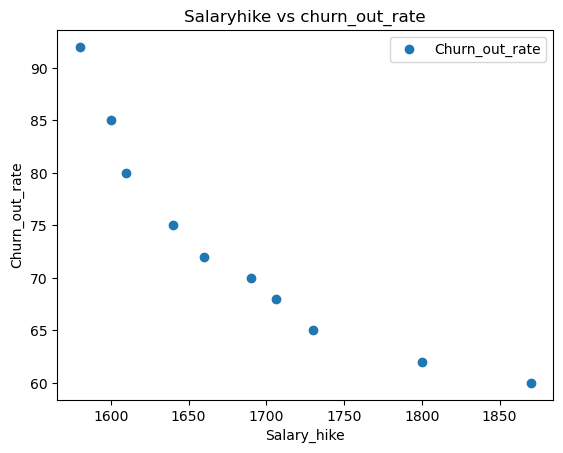

In [19]:
# Data visulaization
churn_df.plot(x='Salary_hike',y='Churn_out_rate',style='o')
plt.title('Salaryhike vs churn_out_rate')
plt.xlabel('Salary_hike')
plt.ylabel('Churn_out_rate')
plt.show()

In [25]:
# now check the realtion b/w variables
# correlation show the strength of the realtion
# covariaence show the direction of the releation
# 1.Pearson's correlation
# 2.Spearmans's correlation

In [27]:
#1. Pearson's correlation
# from the scipy.stats  import pearsonr
from scipy.stats import pearsonr

In [39]:
corr_p,_=pearsonr(churn_df['Salary_hike'],churn_df['Churn_out_rate'])
print('Pearsons correlation : ',corr_p,_)

Pearsons correlation :  -0.9117216186909112 0.0002385777428776382


In [43]:
print('Pearsons correlation : ',corr_p)

Pearsons correlation :  -0.9117216186909112


In [45]:
# 2. Spearmans corrchuealtion
# from scipy.stats import spearmanr
from scipy.stats import spearmanr

In [49]:
corr,_=spearmanr(churn_df['Salary_hike'],churn_df['Churn_out_rate'])
print('Spearmans correlation :%.3f'%corr)

Spearmans correlation :-1.000


C:\Users\AJAY VARMA\AppData\Local\Temp\ipykernel_1892\925761249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_df['Salary_hike'])


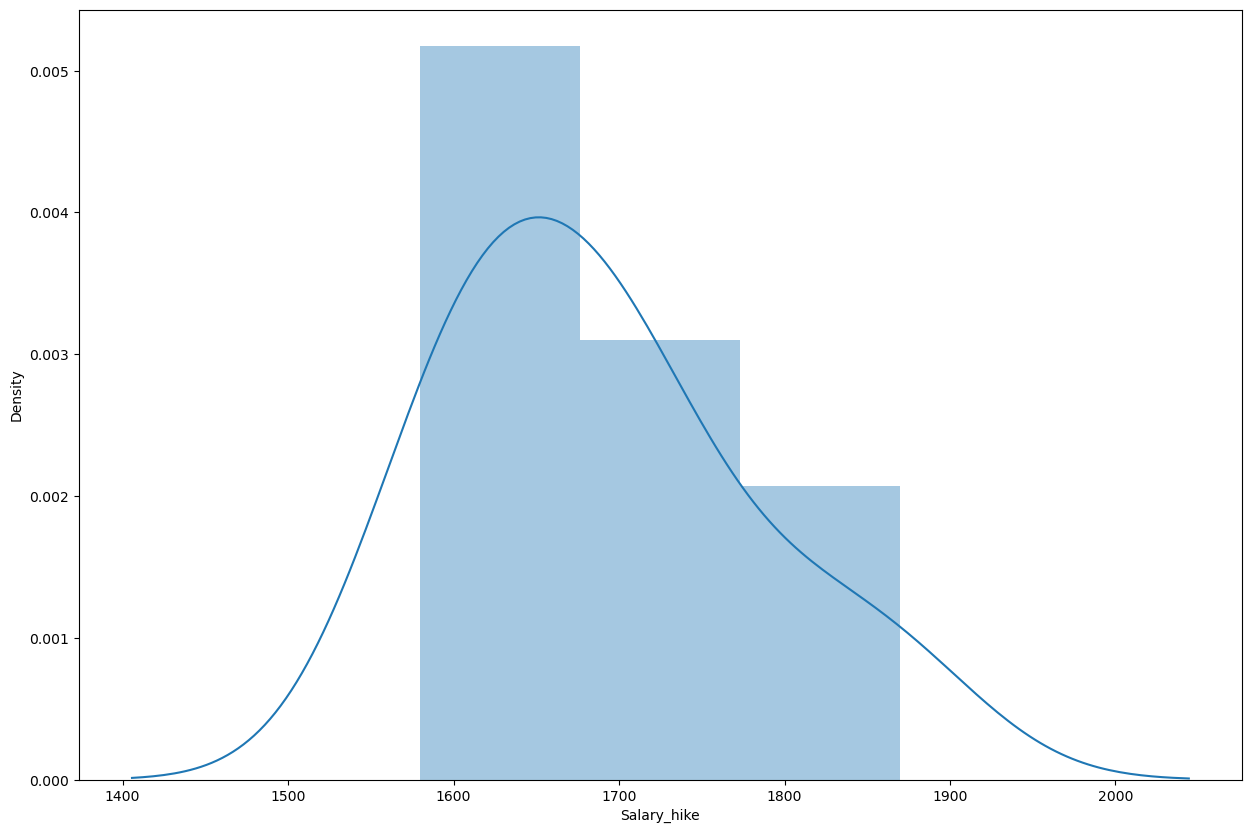

In [55]:
# now check how salary is distribution
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(churn_df['Salary_hike'])
plt.show()

C:\Users\AJAY VARMA\AppData\Local\Temp\ipykernel_1892\3909690760.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_df['Churn_out_rate'])


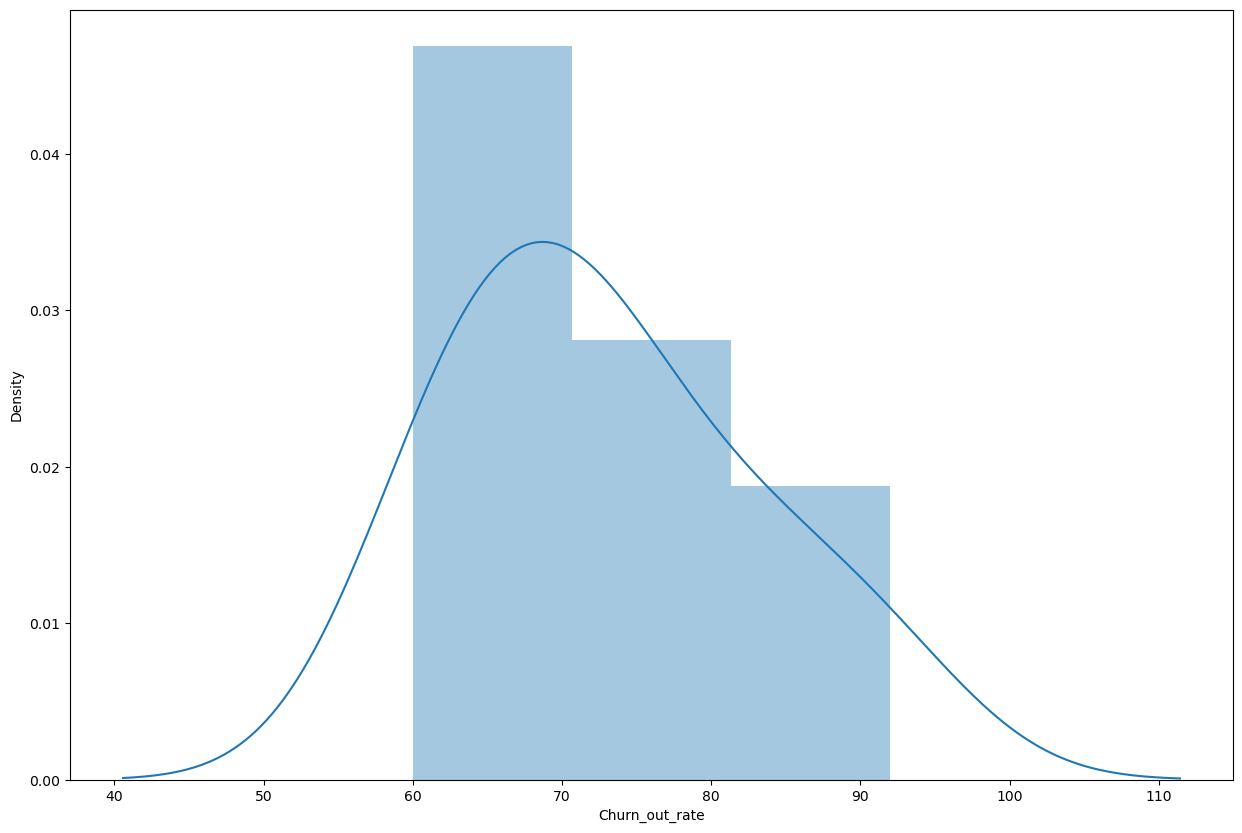

In [57]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(churn_df['Churn_out_rate'])
plt.show()

In [63]:
# input the data
x=churn_df['Salary_hike'].values.reshape(-1,1)
y=churn_df['Churn_out_rate'].values.reshape(-1,1)

In [75]:
print(x)

[[1580]
 [1600]
 [1610]
 [1640]
 [1660]
 [1690]
 [1706]
 [1730]
 [1800]
 [1870]]


In [73]:
print(np.log(y))

[[4.52178858]
 [4.44265126]
 [4.38202663]
 [4.31748811]
 [4.27666612]
 [4.24849524]
 [4.21950771]
 [4.17438727]
 [4.12713439]
 [4.09434456]]


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
predict_reg =LinearRegression()

## Simple model

In [84]:
predict_reg.fit(x_train,y_train)

LinearRegression()

In [96]:
print('intercept value of model' ,predict_reg.intercept_)
print('coefficent value of model ',predict_reg.coef_)

intercept value of model [237.33269953]
coefficent value of model  [[-0.09763174]]


In [106]:
y_pred=predict_reg.predict(x_test)

In [110]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,62,61.595574
1,85,81.121921


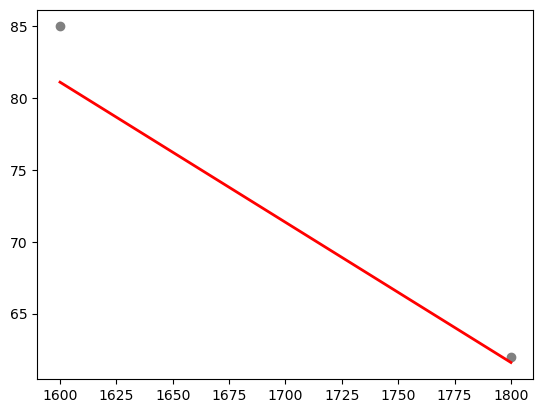

In [114]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

In [98]:
# calculate error rate of the model

In [120]:
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean sqaured error :',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 Score :    ',metrics.r2_score(y_test,y_pred))

Mean absolute error : 2.141252242842981
Mean sqaured error : 7.601526993161889
Root Mean Squared Error : 2.7570866858265246
R^2 Score :     0.9425215350233506


# Logrithm Transformation

In [125]:
# input dataset
x_log=np.log(churn_df['Salary_hike'].values.reshape(-1,1))

In [127]:
# output or predicted value of the dataset
y_log=np.log(churn_df['Churn_out_rate'].values.reshape(-1,1))

In [129]:
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(x_log,y_log,test_size=0.2,random_state=42)

In [131]:
y_pred_log=LinearRegression()
y_pred_log.fit(x_train_log,y_train_log)

LinearRegression()

In [135]:
print('Intercept  value of model is',y_pred_log.intercept_)
print('coefficent of the model ', y_pred_log.coef_)

Intercept  value of model is [21.65242635]
coefficent of the model  [[-2.33862265]]


In [147]:
l_model=y_pred_log.predict(x_test_log)
l_model

array([[4.12318216],
       [4.39863224]])

In [155]:
pmsh_pf_1=pd.DataFrame({'Actual ':y_test_log.flatten(),'Predict':l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,4.127134,4.123182
1,4.442651,4.398632


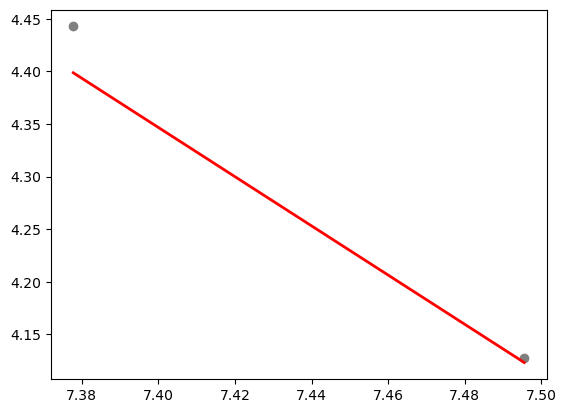

In [165]:
plt.scatter(x_test_log,y_test_log,  color='gray')
plt.plot(x_test_log, l_model, color='red', linewidth=2)
plt.show()

In [169]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(y_test_log, l_model))

Mean Absolute Error: 0.02398562088178524
Mean Squared Error: 0.0009766470474319412
Root Mean Squared Error: 0.03125135272963302
R^2 Score :           0.9607578802385595
